In [1]:
import tensorflow as tf
import numpy as np

In [2]:
g= tf.Graph()# creazione del grafico
with g.as_default(): #aggiunta dei nodi
    tf.set_random_seed(123)
    #placeholders
    tf_x=tf.placeholder(shape=(None),
                       dtype=tf.float32,
                       name='tf_x')
    tf_y=tf.placeholder(shape=(None),
                       dtype=tf.float32,
                       name='tf_y')
    #variabili
    weight=tf.Variable(
        tf.random_normal(
            shape=(1,1),
            stddev=0.25),
            name='weight')
    bias=tf.Variable(0.0, name='bias')
    #modello
    y_hat=tf.add(weight * tf_x, bias,
                name='y_hat')
    cost=tf.reduce_mean(tf.square(tf_y-y_hat), #MSE
                       name='cost')
    #addestramento del modello
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op=optim.minimize(cost,
                           name='train_op')
    #Prepariamo il salvataggio del modello
    saver=tf.train.Saver()

In [3]:
#Creazione di un dataset random
import matplotlib.pyplot as plt
np.random.seed(0)
def make_random_data():
    x= np.random.uniform(low=-2, high=4, size=200)
    y= []
    for t in x:
        r=np.random.normal(loc=0.0,
                           scale=0.5*t*t/3,
                           size=None)
        y.append(r)
    return x, 1.726*x-0.84+np.array(y)
x, y= make_random_data()
plt.plot(x, y, 'o')
plt.show()
        
        

<Figure size 640x480 with 1 Axes>

In [4]:
#split train/test
x_train, y_train= x[:100], y[:100]
x_test, y_test= x[100:], y[100:]
n_epochs=500
training_cost=[]
with tf.Session(graph=g) as sess: #sessione per lancio grafico comuptazionale
    #Inizializzazioni delle variabili
    sess.run(tf.global_variables_initializer())
    #Addestramento modello per n_epochs iterazioni
    for e in range(n_epochs):
        c, _ =sess.run(['cost:0', 'train_op'], #usiamo il nome delle variabili
                       feed_dict={'tf_x:0': x_train,
                                  'tf_y:0': y_train})
        training_cost.append(c)
        if e%50 == 0:
            print('Epoch {:4d}: {:.4f}'.format(e, c))
        #salviamo il modello appena addestrato
        saver.save(sess, './trained-model')    
                       
    

Epoch    0: 11.0212
Epoch   50: 5.9524
Epoch  100: 3.5737
Epoch  150: 2.4277
Epoch  200: 1.8507
Epoch  250: 1.5401
Epoch  300: 1.3573
Epoch  350: 1.2385
Epoch  400: 1.1538
Epoch  450: 1.0890


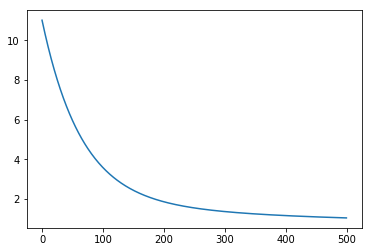

In [5]:
plt.plot(training_cost)
plt.show()

In [6]:
#Ora ricarichiamo la sessione per riusare il modello appena addestrato con i dati di test
g2= tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver=tf.train.import_meta_graph('./trained-model.meta') #importiamo il grafico
    new_saver.restore(sess, './trained-model') #importiamo le variabili
    y_pred=sess.run('y_hat:0',
                   feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


INFO:tensorflow:Restoring parameters from ./trained-model


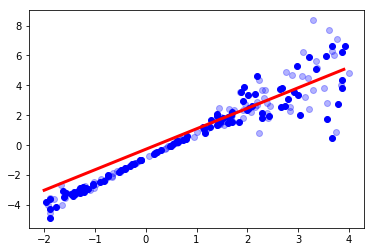

In [9]:
#Ora eseguiamo una predizione su nuovi dati
x_arr=np.arange(-2, 4, 0.1)
g2=tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver=tf.train.import_meta_graph('./trained-model.meta') #importiamo il grafico
    new_saver.restore(sess, './trained-model') #importiamo le variabili
    y_arr=sess.run('y_hat:0',
                  feed_dict={'tf_x:0': x_arr})
    #visualizziamo il grafico
    file_writer=tf.summary.FileWriter(logdir='./logs/', graph=g2)
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:,0], '-r', lw=3)
plt.show()

In [8]:
#Eseguire da console: tensorboard --logdir /percorso directory/logs/
#Appare un indirizzo da cliccare, se non va eseguire pip install tb-nightly 
#Aprire il browser in http://localhost:6006/#graphs